In [107]:
import numpy as np
import matplotlib.pyplot as plt
import os

## check the input requirements
-> tensor

TODO: 
rawdata - nominal - dark_noise
dark_noise from dark noise file get average
nominal --> x,y,
is it needed to see the gausian distribution


In [40]:
# some constants:
DARK_NOISE = [2276,2315,2225,2229]
X_NOMINAL,Y_NOMINAL = 1770,1770

In [41]:
# read the csv file , seperate as x, y, diod1,2,3,4
raw = np.loadtxt("adc_setpoints_18m_x_axis_20_point_plot.csv", delimiter=",",skiprows=1)
diod_1 = raw[:,2]-DARK_NOISE[0]
diod_2 = raw[:,3]-DARK_NOISE[1]
diod_3 = raw[:,4]-DARK_NOISE[2]
diod_4 = raw[:,5]-DARK_NOISE[3]
# in_set = torch.tensor(raw[:,0:2], dtype=torch.float32)
# out_set =  torch.tensor(raw[:,2:6], dtype=torch.float32)

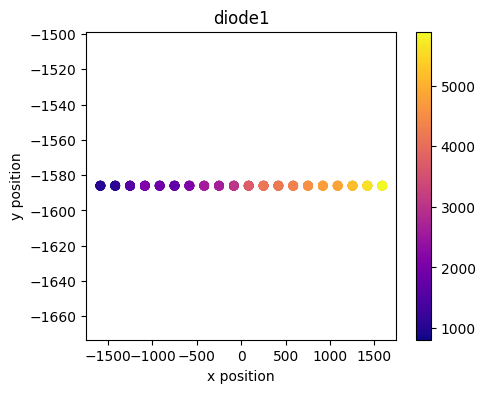

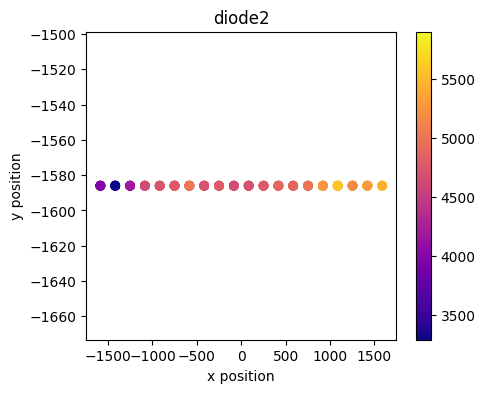

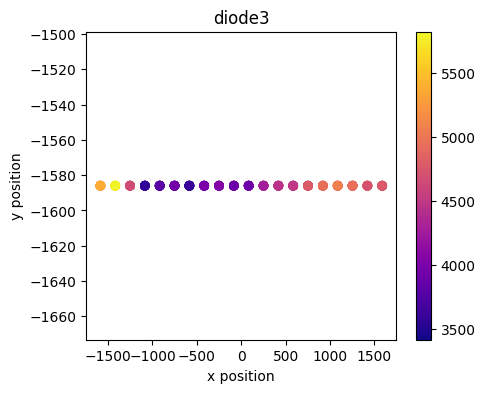

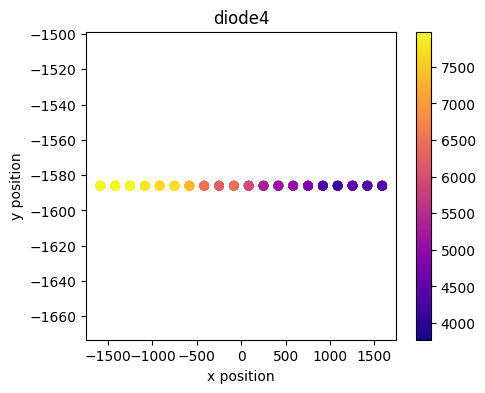

In [42]:
plt.figure(figsize=(5,4))
plt.scatter(raw[:,0]-X_NOMINAL, raw[:,1]-Y_NOMINAL, c=diod_1, cmap='plasma')
plt.colorbar()
plt.title("diode1")
plt.xlabel("x position")
plt.ylabel("y position")
plt.figure(figsize=(5, 4))
plt.scatter(raw[:,0]-X_NOMINAL, raw[:,1]-Y_NOMINAL, c=diod_2, cmap='plasma')
plt.colorbar()
plt.title("diode2")
plt.xlabel("x position")
plt.ylabel("y position")
plt.figure(figsize=(5, 4))
plt.scatter(raw[:,0]-X_NOMINAL, raw[:,1]-Y_NOMINAL, c=diod_3, cmap='plasma')
plt.colorbar()
plt.title("diode3")
plt.xlabel("x position")
plt.ylabel("y position")
plt.figure(figsize=(5, 4))
plt.scatter(raw[:,0]-X_NOMINAL, raw[:,1]-Y_NOMINAL, c=diod_4, cmap='plasma')
plt.colorbar()
plt.title("diode4")
plt.xlabel("x position")
plt.ylabel("y position")
plt.show()


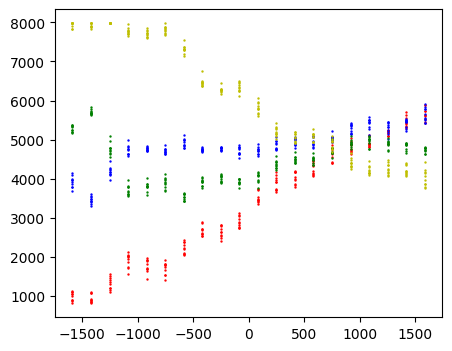

In [45]:
plt.figure(figsize=(5,4))
plt.scatter(raw[:,0]-X_NOMINAL,diod_1,s=0.5,c='r')
plt.scatter(raw[:,0]-X_NOMINAL,diod_2,s=0.5,c='b')
plt.scatter(raw[:,0]-X_NOMINAL,diod_3,s=0.5,c='g')
plt.scatter(raw[:,0]-X_NOMINAL,diod_4,s=0.5,c='y')

In [26]:
print(f"diod1 min and max: {diod_1.min()},{diod_1.max()}")
print(f"diod2 min and max: {diod_2.min()},{diod_2.max()}")
print(f"diod3 min and max: {diod_3.min()},{diod_3.max()}")
print(f"diod4 min and max: {diod_4.min()},{diod_4.max()}")

diod1 min and max: 807.0,5891.0
diod2 min and max: 3287.0,5902.0
diod3 min and max: 3416.0,5823.0
diod4 min and max: 3772.0,7979.0


Text(0, 0.5, 'diode data')

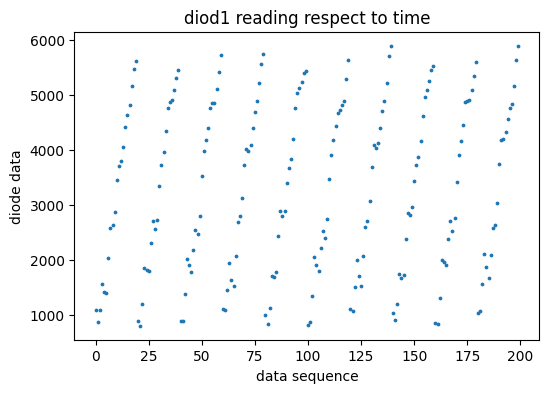

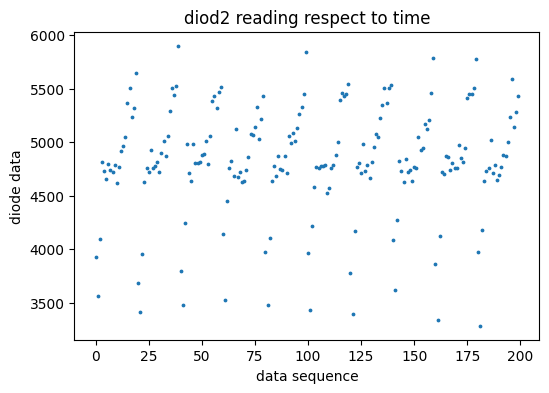

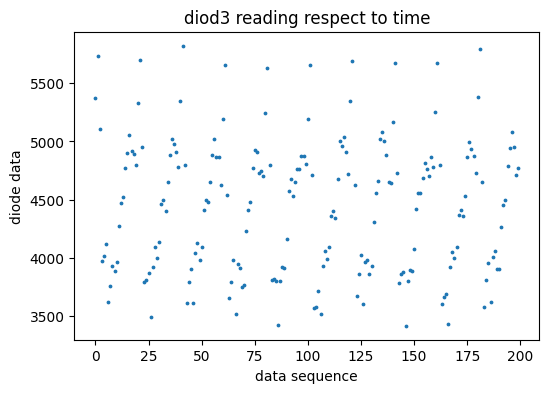

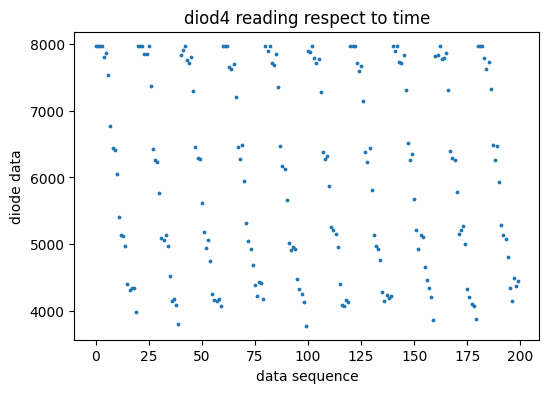

In [27]:
plt.figure(figsize=(6, 4))
plt.scatter(range(len(raw[:,2])),diod_1,s=3)
plt.title("diod1 reading respect to time")
plt.xlabel("data sequence")
plt.ylabel("diode data")
plt.figure(figsize=(6, 4))
plt.scatter(range(len(raw[:,2])),diod_2,s=3)
plt.title("diod2 reading respect to time")
plt.xlabel("data sequence")
plt.ylabel("diode data")
plt.figure(figsize=(6, 4))
plt.scatter(range(len(raw[:,2])),diod_3,s=3)
plt.title("diod3 reading respect to time")
plt.xlabel("data sequence")
plt.ylabel("diode data")
plt.figure(figsize=(6, 4))
plt.scatter(range(len(raw[:,2])),diod_4,s=3)
plt.title("diod4 reading respect to time")
plt.xlabel("data sequence")
plt.ylabel("diode data")


In [28]:
diod1_mean = np.array(diod_1).mean()
diod2_mean = np.array(diod_2).mean()
diod3_mean = np.array(diod_3).mean()
diod4_mean = np.array(diod_4).mean()
diod1_std = np.array(diod_1).std()
diod2_std = np.array(diod_2).std()
diod3_std = np.array(diod_3).std()
diod4_std = np.array(diod_4).std()

In [29]:
diod1_mean,diod1_std,diod2_mean,diod2_std,diod3_mean,diod3_std,diod4_mean,diod4_std

(np.float64(3264.915),
 np.float64(1522.1702492740424),
 np.float64(4823.555),
 np.float64(513.5349033658764),
 np.float64(4445.56),
 np.float64(576.6357918131687),
 np.float64(6035.735),
 np.float64(1460.1577670837491))

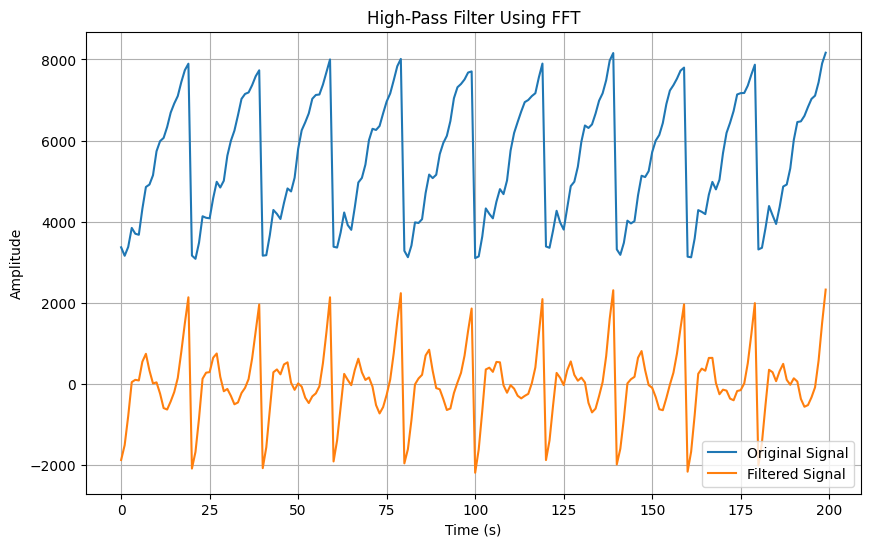

In [30]:
# FFT
diod_1 = raw[:,2]
fft_signal = np.fft.fft(raw[:,2])
frequencies = np.fft.fftfreq(len(diod_1), d=0.001)

# Apply high-pass filter
cutoff = 100 # Cutoff frequency in Hz
fft_signal[np.abs(frequencies) < cutoff] = 0  # Zero out low frequencies

# Perform inverse FFT
filtered_signal = np.fft.ifft(fft_signal)

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(range(len(diod_1)), diod_1, label='Original Signal')
plt.plot(range(len(diod_1)), filtered_signal.real, label='Filtered Signal')
plt.legend()
plt.title('High-Pass Filter Using FFT')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


In [31]:
t = np.linspace(0, 1, 500, endpoint=False)

In [32]:
frequencies.min()


np.float64(-500.0)

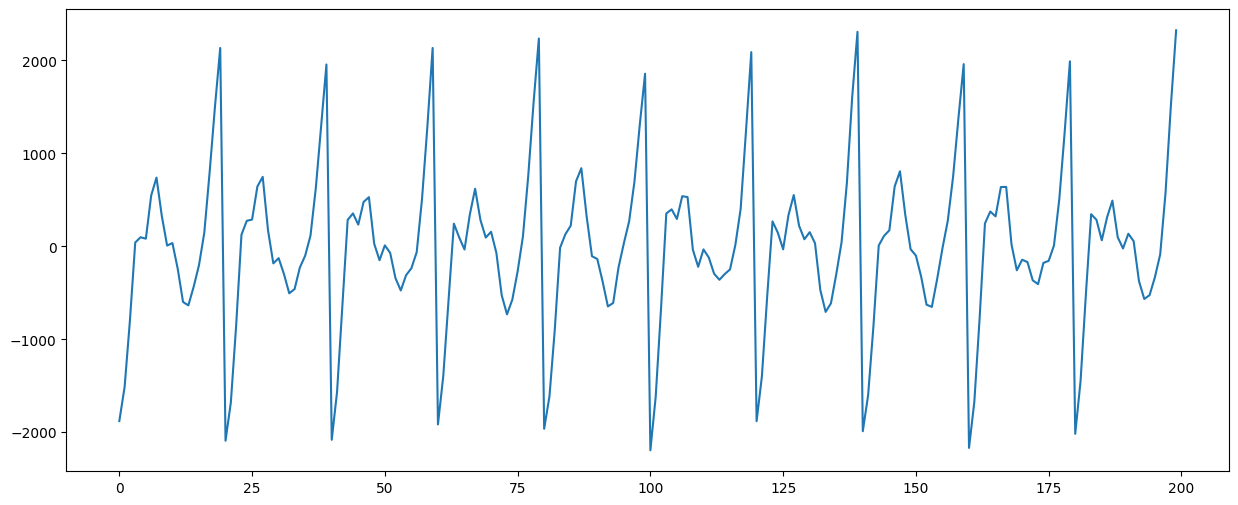

In [33]:
plt.figure(figsize=(15, 6))
plt.plot(range(len(diod_1)), filtered_signal.real, label='Filtered Signal')

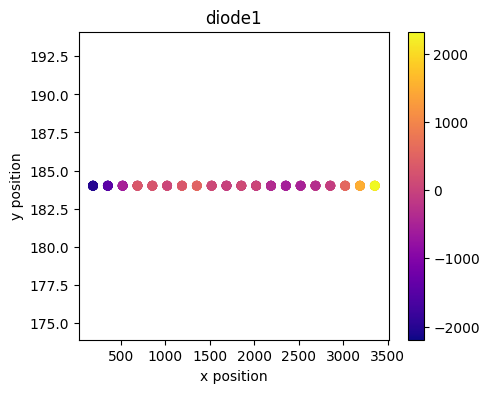

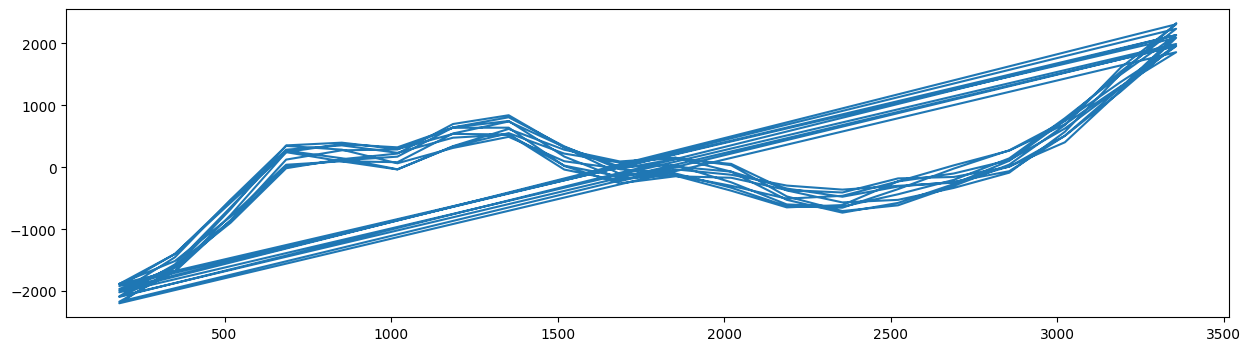

In [34]:
plt.figure(figsize=(5,4))
plt.scatter(raw[:,0], raw[:,1], c=filtered_signal.real, cmap='plasma')
plt.colorbar()
plt.title("diode1")
plt.xlabel("x position")
plt.ylabel("y position")
plt.figure(figsize=(15,4))
plt.plot(raw[:,0],filtered_signal.real)

In [35]:
len(filtered_signal.real)

200

# make the train set
- 18m_40_points_x_axis_#1(1-401)
- 18m_40_points_x_axis_#2(1-401)
- 18m_40_points_x_axis_halfway_#1.csv (1-401) lot more noiser?
- 18m_40_points_x_axis_halfway_#2.csv (1-401)

PreProcess:
- get rid of the saturating points?
-- when the gradient is very little(not much changing)
- some noise reduction?
-- Kalman filter?
- make sure it's all done in similar power level(10%?15%?)
- make sure the data set is more balanced
- avoid saturation

In [1]:
import torch
from torch.utils.data import Dataset
import numpy as np
import os   

In [6]:
class Diods4DatasetAll(Dataset):
    def __init__(self,root_dir):
        
        raw = np.loadtxt("curr_diodes_data/diodes_read_offset_fixed.csv", delimiter=",") + np.loadtxt(
            "18m_40_points_x_axis_#1.csv"
        )
        # raw add more files here
        self.PreProcess()
        self.tar_set = torch.tensor(raw[:,0:2], dtype=torch.float16)
        self.in_set = torch.tensor(raw[:,2:6], dtype=torch.float16)
        #200 for train 200 for validation, random sample that much
        self.val_in = []
        self.val_tar = []
        
    def PreProcess(self):       
        pass

SyntaxError: invalid syntax (2492430595.py, line 4)

Data set structure:
- load data, the all one include everything
- preproicess:
 - get rid of saturating part
 - kalman filter?
 - balance the number of less than 1770 and more than 1770

In [83]:
# load data
# for loop open all the files and combine as one np.array data
root_path = "TrainSet"

raw = []
for data_file in os.listdir(root_path):
    if data_file.endswith(".csv"):
        file_path = os.path.join(root_path,data_file)
        raw.extend(np.loadtxt(file_path,delimiter=',',skiprows=1,usecols=(0,2,3,4,5)))
raw = np.array(raw)

## get rid off the saturated points
# Dumb way, just get rid off everything bigger than 10000
data_no_sature=[]
for i in raw:
    if all(i<=10000):
        data_no_sature.append(i)
data_no_sature = np.array(data_no_sature)
## TODO: balance the number of points
# count the number of points x<1770 and x>1770
dat_bigger = []
dat_less = []
for x_data in data_no_sature:
    if x_data[0] >= 1770:
        dat_bigger.append(x_data)
    else:
        dat_less.append(x_data)


In [84]:
len(dat_bigger)

616

In [85]:
len(dat_less)

555

In [104]:
len(data_no_sature)

1171

In [87]:
# load data
# for loop open all the files and combine as one np.array data
root_path = "TrainSet"

raw = []
for data_file in os.listdir(root_path):
    if data_file.endswith(".csv"):
        file_path = os.path.join(root_path,data_file)
        raw.extend(np.loadtxt(file_path,delimiter=',',skiprows=1,usecols=(0,2,3,4,5)))
raw = np.array(raw)

## get rid off the saturated points
# Dumb way, just get rid off everything bigger than 10000
data_no_sature=[]
for i in raw:
    if all(i<=10000):
        data_no_sature.append(i)
data_no_sature = np.array(data_no_sature)
## TODO: balance the number of points
# count the number of points x<1770 and x>1770
dat_bigger = []
dat_less = []
for x_data in data_no_sature:
    if x_data[0] >= 1770:
        dat_bigger.append(x_data)
    else:
        dat_less.append(x_data)


In [97]:
class Diods4DatasetAll(Dataset):
    def __init__(self,root_path):
        self.root_dir = root_path        
        self.in_set,self.tar_set = self.NoSaturateBalanced()

    def NoSaturateBalanced(self):
        raw = []
        for data_file in os.listdir(self.root_dir):
            if data_file.endswith(".csv"):
                file_path = os.path.join(self.root_dir,data_file)
                raw.extend(np.loadtxt(file_path,delimiter=',',skiprows=1,usecols=(0,2,3,4,5)))
        raw = np.array(raw)

        ## get rid off the saturated points
        # Dumb way, just get rid off everything bigger than 10000
        data_no_sature=[]
        for i in raw:
            if all(i<=10000):
                data_no_sature.append(i)
        data_no_sature = np.array(data_no_sature)

        in_set = torch.tensor(data_no_sature[:,1:6], dtype=torch.float16)
        tar_set = torch.tensor(data_no_sature[:,0], dtype=torch.float16)
        return in_set,tar_set
    

In [101]:
set = Diods4DatasetAll("TrainSet")

In [103]:
set.tar_set

tensor([1186., 1353., 1520.,  ..., 3356.,  184., 3356.], dtype=torch.float16)

In [135]:
class Diods4DatasetAll(Dataset):
    def __init__(self,root_path):
        self.root_dir = root_path        
        
        self.data =[]
        self.in_set,self.tar_set = self.NoSaturateBalanced()

    def NoSaturateBalanced(self):
        raw = []
        for data_file in os.listdir(self.root_dir):
            if data_file.endswith(".csv"):
                file_path = os.path.join(self.root_dir,data_file)
                raw.extend(np.loadtxt(file_path,delimiter=',',skiprows=1,usecols=(0,2,3,4,5)))
        raw = np.array(raw)

        ## get rid off the saturated points
        # Dumb way, just get rid off everything bigger than 10000
        in_no_sature=[]
        tar_no_sature=[]
        for i in raw:
            if i[0]>4095:
                continue
            if all(i<=10000):
                in_no_sature.append(i[1:6])
                tar_no_sature.append([i[0]])
                self.data.append(i)
        in_set = torch.tensor(np.array(in_no_sature), dtype=torch.float32)
        tar_set = torch.tensor(np.array(tar_no_sature), dtype=torch.float32)
        return in_set,tar_set

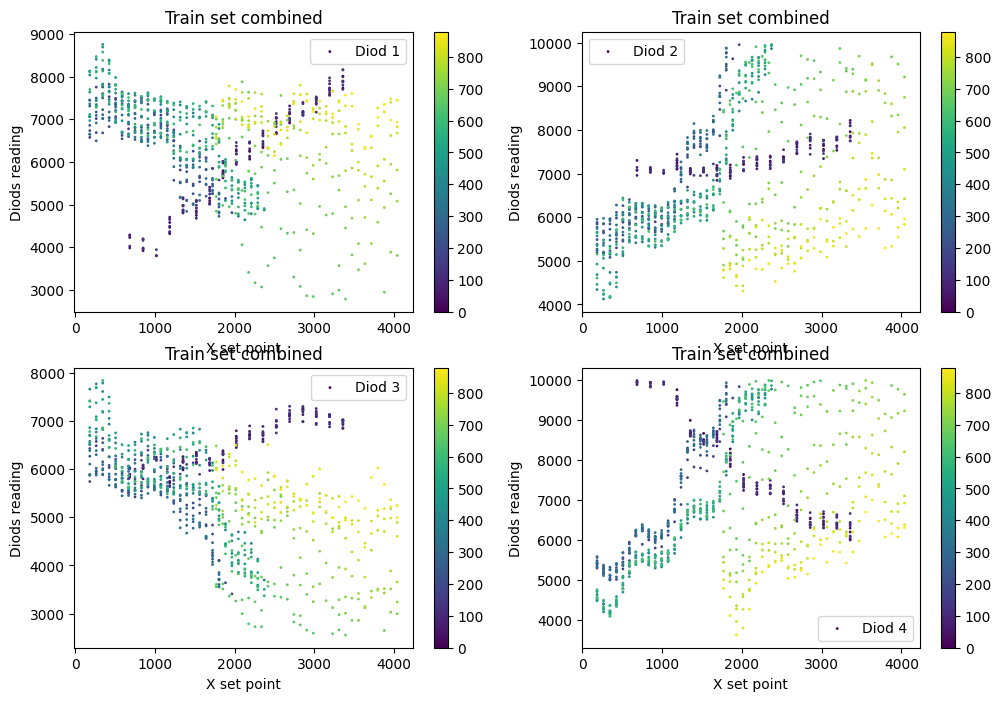

In [133]:
setss = Diods4DatasetAll("TrainSet")
dat = np.array(setss.data)
plt.figure(figsize=(12,8))
for i in range(1,5):
    plt.subplot(2,2,i)
    plt.scatter(dat[:,0],dat[:,i],s=1,label=f"Diod {i}",c=range(len(dat)))
    plt.colorbar()
    plt.legend()
    plt.title("Train set combined")
    plt.xlabel("X set point")
    plt.ylabel("Diods reading")
plt.show()


In [117]:
dat

array([[1186., 4317., 7111., 5841., 9767.],
       [1353., 4855., 7052., 5986., 8998.],
       [1520., 4915., 7037., 6152., 8672.],
       ...,
       [3357., 7911., 7287., 5386., 5957.],
       [ 184., 3602., 5317., 6758., 9662.],
       [3357., 7392., 7717., 5649., 5372.]])

In [ ]:
## Test set use the scanning one


In [136]:
class Diods4DatasetClean(Dataset):
    def __init__(self,root_path):
        self.root_dir = root_path        
        
        self.data =[]
        self.in_set,self.tar_set = self.FormSet()

    def FormSet(self):
        raw = []
        for data_file in os.listdir(self.root_dir):
            if data_file.endswith(".csv"):
                if data_file.endswith("halfway_#1.csv"):
                    continue
                file_path = os.path.join(self.root_dir,data_file)
                raw.extend(np.loadtxt(file_path,delimiter=',',skiprows=1,usecols=(0,2,3,4,5)))
        raw = np.array(raw)

        ## get rid off the saturated points
        # Dumb way, just get rid off everything bigger than 10000
        in_no_sature=[]
        tar_no_sature=[]
        for i in raw:
            if i[0]>4095:
                continue
            if all(i<=10000):
                in_no_sature.append(i[1:6])
                tar_no_sature.append([i[0]])
                self.data.append(i)
        in_set = torch.tensor(np.array(in_no_sature), dtype=torch.float32)
        tar_set = torch.tensor(np.array(tar_no_sature), dtype=torch.float32)
        return in_set,tar_set
        

In [139]:
test_set = Diods4DatasetClean("TrainSet")
len(test_set.in_set)

640

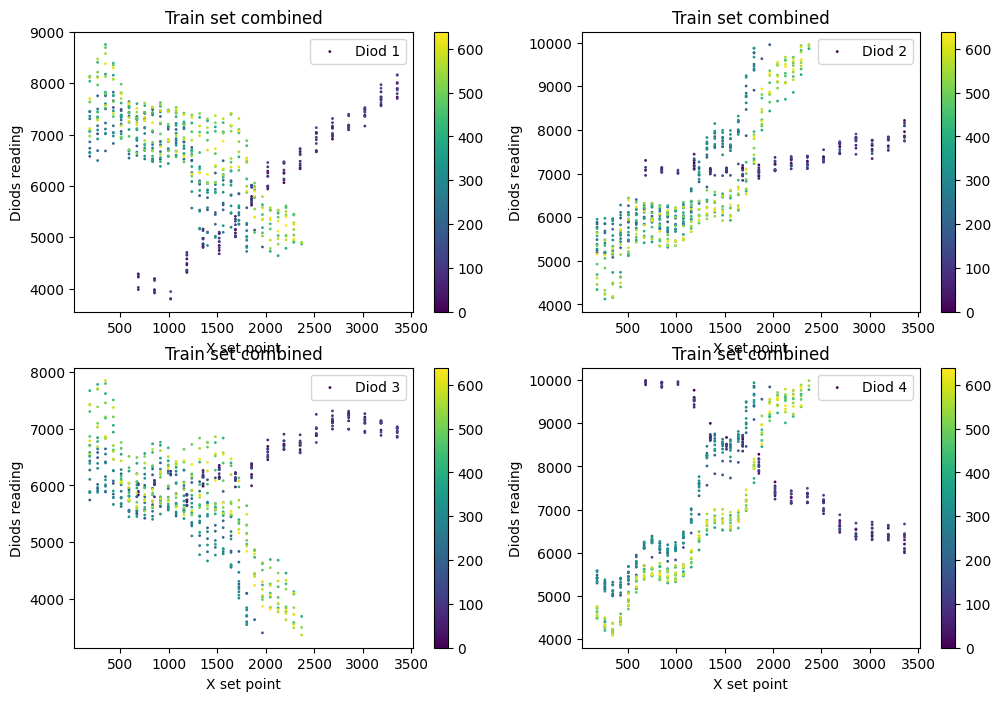

In [ ]:
setss = Diods4DatasetClean("TrainSet")
dat = np.array(setss.data)
plt.figure(figsize=(12,8))
for i in range(1,5):
    plt.subplot(2,2,i)
    plt.scatter(dat[:,0],dat[:,i],s=1,label=f"Diod {i}",c=range(len(dat)))
    plt.colorbar()
    plt.legend()
    plt.title("Train set cleaner")
    plt.xlabel("X set point")
    plt.ylabel("Diods reading")
plt.show()


making new train set from 18/12 data

In [ ]:
class Diods4DatasetNew(Dataset):
    def __init__(self,root_path):
        self.root_dir = root_path        
        
        self.data =[]
        self.in_set,self.tar_set = self.FormSet()

    def FormSet(self):
        raw = []
        for data_file in os.listdir(self.root_dir):
            if data_file.endswith(".csv"):
                if data_file.startswith("y"):
                    continue
                file_path = os.path.join(self.root_dir,data_file)
                raw.extend(np.loadtxt(file_path,delimiter=',',skiprows=1,usecols=(0,2,3,4,5)))
        raw = np.array(raw)

        ## get rid off the saturated points
        # Dumb way, just get rid off everything bigger than 10000
        in_no_sature=[]
        tar_no_sature=[]
        for i in raw:
            if i[0]>4095:
                continue
            if all(i<=10000):
                in_no_sature.append(i[1:6])
                tar_no_sature.append([i[0]])
                self.data.append(i)
        in_set = torch.tensor(np.array(in_no_sature), dtype=torch.float32)
        tar_set = torch.tensor(np.array(tar_no_sature), dtype=torch.float32)
        return in_set,tar_set
        

In [16]:
class Diods4DatasetAll(Dataset):
    def __init__(self,root_path):
        self.root_dir = root_path        
        self.in_set,self.tar_set = self.NoSaturateBalanced()

    def NoSaturateBalanced(self):
        raw = []
        for data_file in os.listdir(self.root_dir):
            if data_file.endswith(".csv"):
                file_path = os.path.join(self.root_dir,data_file)
                if data_file.endswith("hil.csv"):
                    raw.extend(np.loadtxt(file_path,delimiter=',',skiprows=1,usecols=(0,1,2,3,4,5),max_rows=1024))
                    continue
                raw.extend(np.loadtxt(file_path,delimiter=',',skiprows=1,usecols=(0,1,2,3,4,5),max_rows=400))
        raw = np.array(raw)

        ## get rid off the saturated points
        # Dumb way, just get rid off everything bigger than 10000
        in_no_sature=[]
        tar_no_sature=[]
        for i in raw:
            if i[0]>4095:
                continue
            if all(i<=10000):
                in_no_sature.append(i[2:6])
                tar_no_sature.append(i[0:2])

        in_set = torch.tensor(np.array(in_no_sature), dtype=torch.float32)
        tar_set = torch.tensor(np.array(tar_no_sature), dtype=torch.float32)
        return in_set,tar_set

In [17]:
train_set = Diods4DatasetAll("TrainSet")

In [22]:
train_set.in_set.size()

torch.Size([4672, 4])

In [13]:
class Diods4DatasetAll(Dataset):
    def __init__(self,root_path):
        self.root_dir = root_path        
        self.in_set,self.tar_set = self.LoadData()

    def LoadData(self):   
        in_set = np.empty((0, 4))  # Initialize with correct dimensions for input columns
        out_set = np.empty((0, 2))  # Initialize with correct dimensions for output columns   
        for data_file in os.listdir(self.root_dir):
            if data_file.endswith(".csv"):
                file_path = os.path.join(self.root_dir,data_file)
                file_data_in = np.loadtxt(file_path,delimiter=',',skiprows=1,max_rows=1024,usecols=(2,3,4,5))
                file_data_out = np.loadtxt(file_path,delimiter=',',skiprows=1,max_rows=1024,usecols=(0,1))
                in_set = np.vstack((in_set,file_data_in))
                out_set = np.vstack((out_set,file_data_out))
        in_set = torch.tensor(np.array(in_set), dtype=torch.int16)
        tar_set = torch.tensor(np.array(in_set), dtype=torch.int16)
        return in_set,tar_set

In [14]:
train_set = Diods4DatasetAll("TrainSet")
train_set.in_set

C:\Users\dilna\AppData\Local\Temp\ipykernel_62848\1268293555.py:17: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  tar_set = torch.tensor(np.array(in_set), dtype=torch.int16)


tensor([[4685, 4367, 5095, 4632],
        [4622, 4417, 5093, 4610],
        [4639, 4447, 5109, 4606],
        ...,
        [5169, 4706, 4620, 4176],
        [5185, 4693, 4660, 4180],
        [5197, 4698, 4650, 4186]], dtype=torch.int16)

In [16]:
len(train_set.in_set)

3072

In [17]:
1024*3


3072